In [3]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline

#EDA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#importing classification models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 9999


In [31]:
#Import the dataset
data = pd.read_csv("../data/cardio_train.csv")
data.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
df = data.copy()

In [33]:
data.drop('id', inplace=True, axis=1)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


# EDA

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,70000.0,19468.865814,2467.251667,10798.0,17664.0,19703.0,21327.0,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.0,1.0,2.0,2.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.0,1.0,2.0,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.0,1.0,1.0,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.0,0.0,0.0,1.0
alco,70000.0,0.053771,0.225568,0.0,0.0,0.0,0.0,1.0


In [36]:
data.drop_duplicates(inplace=True)

Age is given in number of days, we need ot convert it into years.

In [37]:
#Converting age from days to years
data['age'] = (data['age'] / 365).round().astype('int64')

In [38]:
#ap_lo (diastolic bp) cannot be higher than ap_hi (systolic bp)
data = data.drop(data[data['ap_lo'] > data['ap_hi']].index)

In [39]:
#create a body mass index 'bmi' feature from weight and height columns
data["bmi"] = data["weight"] / (data["height"]/100)**2

In [40]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
dtype: int64

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68742 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68742 non-null  int64  
 1   gender       68742 non-null  int64  
 2   height       68742 non-null  int64  
 3   weight       68742 non-null  float64
 4   ap_hi        68742 non-null  int64  
 5   ap_lo        68742 non-null  int64  
 6   cholesterol  68742 non-null  int64  
 7   gluc         68742 non-null  int64  
 8   smoke        68742 non-null  int64  
 9   alco         68742 non-null  int64  
 10  active       68742 non-null  int64  
 11  cardio       68742 non-null  int64  
 12  bmi          68742 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.3 MB


In [42]:
data.shape

(68742, 13)

In [43]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


For visualization purposes, we rename the categorical values in our dataset.

In [44]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [45]:
columns = ['age', 'height', 'weight', 'ap_lo', 'ap_hi', 'bmi']

In [46]:
plt.figure(figsize=(25, 15))
for i, col in enumerate(columns):
#     print(i, col)
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=data, x=col, ax=ax,color='blue',kde=True)
    plt.suptitle('Data distribution')
    plt.tight_layout()

Error in callback <function flush_figures at 0x000001675C8E2E50> (for post_execute):


KeyboardInterrupt: 

In [48]:
for col in columns:
    column = data[col]
    count = (column < 0).sum()
    print(col, ': ', count)

age :  0
height :  0
weight :  0
ap_lo :  1
ap_hi :  0
bmi :  0


There is one negative values in ap_lo, diastolic bp cannot be negative. Eliminating this value.

In [49]:
data = data.drop(data[data['ap_lo'] < 0].index)

In [50]:
data.shape

(68741, 13)

Systolic bp cannot be lower than 70 and higher than 200, diastolic bp cannot be less than 40 and more than 130. We remove the values which do not pass this criteria.

In [51]:
data.drop(data[(data.ap_hi < 70) | (data.ap_hi > 200)].index, inplace = True)
data.drop(data[(data.ap_lo < 40) | (data.ap_lo > 130)].index, inplace = True)

In [52]:
data.shape

(68582, 13)

In [53]:
df = data.copy(deep = True)

df['gender'].replace({1: 'woman', 2: 'man'}, inplace = True)
df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'}, inplace = True)
df['smoke'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['alco'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['active'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['cardio'].replace({0: 'No', 1: 'Yes'}, inplace = True)

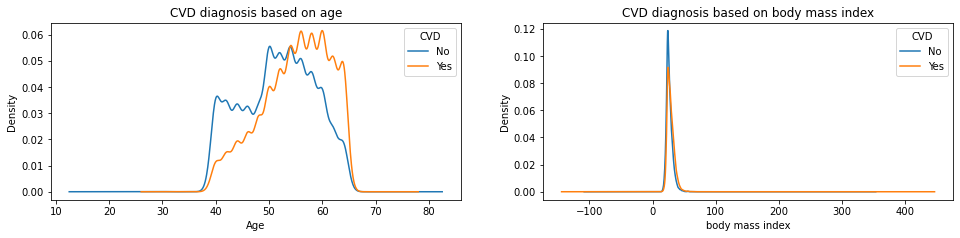

In [54]:
plt.figure(figsize =(25,15))
ax = plt.subplot(4,3, 1)
ax = df.groupby('cardio')['age'].plot(kind='kde', legend=True)
plt.title('CVD diagnosis based on age')
plt.xlabel('Age')
plt.legend(title="CVD")

ax = plt.subplot(4,3, 2)
ax = df.groupby('cardio')['bmi'].plot(kind='kde', legend=True)
plt.title('CVD diagnosis based on body mass index')
plt.xlabel('body mass index')
plt.legend(title="CVD")

Text(0.5, 1.0, 'cardiovascluar disease presence with age')

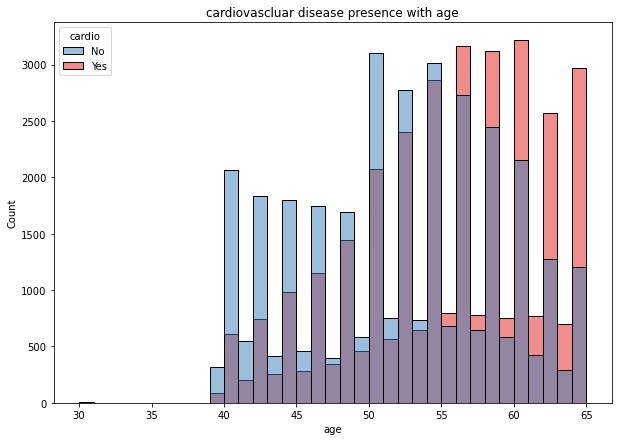

In [55]:
palette = {'No': '#377EB8', 'Yes': '#E41A1C'}
plt.figure(figsize=(10,7))
sns.histplot(data = df, x = 'age', hue = 'cardio', binwidth = 1, palette = palette, stat = 'count', alpha = 0.5)
plt.title("cardiovascluar disease presence with age")

Text(0.5, 1.0, 'cardiovascluar disease presence with age')

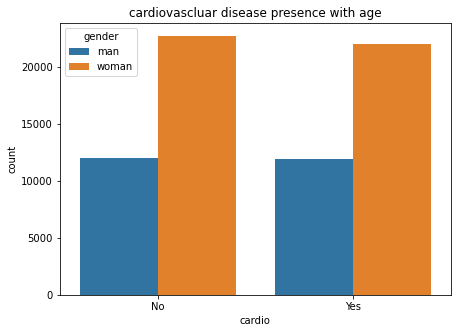

In [56]:
plt.figure(figsize=(7,5))
sns.countplot(data = df, x = 'cardio', hue = 'gender')
plt.title("cardiovascluar disease presence with age")

From the above graphs,
* the people who are much older have more chances of having cardio vascular disease. people in the age range 55 to 65.
* from age 40 to 50, it is less likely to have CVD.
* The dataset reflects "woman" in about 65% of the cases, and "men" in the remaining 35%. However, the proportions of those with disease and those without it are roughly identical in both groups.

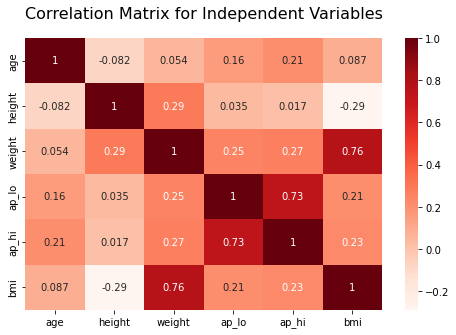

In [57]:
# heatmap for correlation
plt.figure(figsize = (8, 5))
plt.title('Correlation Matrix for Independent Variables', fontsize = 16, y = 1.05)

sns.heatmap(df[columns].corr(), annot = True, cmap = 'Reds');

In [ ]:
data.head()

In [27]:
data.shape

(68582, 13)

Compared to the shape of the dataset, the outliers detected above can be removed instead of imputing them with any values such as mean, 5th and 95th percentile values and so on.

In [58]:
# Checking outliers - detecting and handling outliers only for the continuous features
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    IQR = q3-q1
    min_Value = q1-1.5*IQR
    max_Value = q3+1.5*IQR

    outliers = []
    for i in data[col]:
        #print(i)
        if i< min_Value or i>max_Value:
            outliers.append(i)
    print(f"Outliers in {col}:",len(outliers))
    
    df_out = data.loc[(data[col] > min_Value) & (data[col] < max_Value)]


Outliers in age: 4
Outliers in height: 505
Outliers in weight: 1738
Outliers in ap_lo: 3445
Outliers in ap_hi: 946
Outliers in bmi: 2017


In [59]:
df_out.shape

(66565, 13)

In [60]:
df_out.describe().T

,count,mean,std,min,25%,50%,75%,max
age,66565.0,53.298655,6.774862,30.000000,48.00000,54.000000,58.0000,65.000000
gender,66565.0,1.354916,0.478492,1.000000,1.00000,1.000000,2.0000,2.000000
height,66565.0,164.577375,7.801307,120.000000,159.00000,165.000000,170.0000,207.000000
weight,66565.0,73.032437,12.711089,28.000000,64.00000,71.000000,80.0000,135.000000
ap_hi,66565.0,126.283933,16.311126,70.000000,120.00000,120.000000,140.0000,200.000000
ap_lo,66565.0,81.112612,9.266658,40.000000,80.00000,80.000000,90.0000,130.000000
cholesterol,66565.0,1.356358,0.672342,1.000000,1.00000,1.000000,1.0000,3.000000
gluc,66565.0,1.220191,0.566020,1.000000,1.00000,1.000000,1.0000,3.000000
smoke,66565.0,0.089011,0.284761,0.000000,0.00000,0.000000,0.0000,1.000000
alco,66565.0,0.053286,0.224605,0.000000,0.00000,0.000000,0.0000,1.000000


Since out data does not follow gaussian distribution (i.e. it is not normal) we apply normalization to our data which adjusts the values of our numeric data to common scale without altering the range of the data. We also have removed outliers as well.

In [61]:
df_out['cardio'].value_counts()

0    34037
1    32528
Name: cardio, dtype: int64

In [62]:
X = df_out.loc[:, df.columns != 'cardio']
y = df_out[['cardio']]

In [63]:
X.shape

(66565, 12)

In [64]:
y.shape

(66565, 1)

In [65]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)

X = norm.transform(X)

In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [67]:
print('Training dataset size:', X_train.shape)
print('Validation dataset size:', X_val.shape)

Training dataset size: (49923, 12)
Validation dataset size: (16642, 12)


### Decision Tree

In [68]:
#gridsearch to find best parameters for decision tree classifier
params = {'criterion' : ['gini', "entropy", "log_loss"],
          'splitter'  : ['best'], 
          'max_depth' : range(2,11,1),
         'max_features' : range(2,11,1)}

grid = GridSearchCV(DecisionTreeClassifier(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_val) 

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'splitter': 'best'}


Accuracy of the Decision Tree model: 72.87%

f1 score of the Decision Tree model: 73.0%

Cross validation accuracy of the Decision Tree model: 72.79%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      9488
           1       0.66      0.75      0.70      7154

    accuracy                           0.73     16642
   macro avg       0.73      0.73      0.73     16642
weighted avg       0.74      0.73      0.73     16642



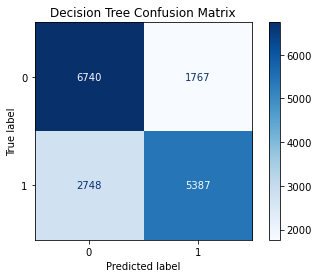

In [69]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=7, max_features=9, splitter='best')

dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(dt_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the Decision Tree model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the Decision Tree model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the Decision Tree model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Decision Tree Confusion Matrix")
plt.grid(visible=False)
plt.show()

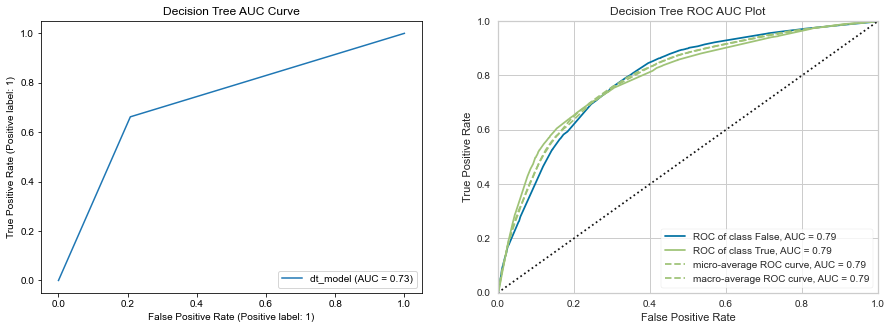

In [70]:
plt.figure(figsize=(15, 5))

from sklearn.metrics import RocCurveDisplay
ax1 = plt.subplot(1,2,1)
disp_roc = RocCurveDisplay.from_predictions(y_val,y_pred, ax=ax1, name="dt_model")
plt.title("Decision Tree AUC Curve")

from yellowbrick.classifier import ROCAUC
ax2 = plt.subplot(1,2,2)
rocauc = ROCAUC(dt_model, classes=['False', 'True'], ax=ax2,
                   title='Decision Tree ROC AUC Plot')
rocauc.fit(X_train, y_train)
rocauc.score(X_val, y_val)
rocauc.finalize()

plt.show()

In [71]:
model_comparison = {}
model_comparison['Decision Tree']=[accuracy,
                                   f1score,
                                   np.mean(cv)]

In [72]:
#gridsearch to find best parameters for random forest classifier
params = {'criterion' : ['gini', "entropy", "log_loss"], 
          'max_depth' : range(2,11,1),
         'n_estimators' : range(2,11,1),
         'n_jobs': [2,3,4,5]}

grid = GridSearchCV(RandomForestClassifier(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_val) 

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
{'criterion': 'log_loss', 'max_depth': 9, 'n_estimators': 10, 'n_jobs': 5}


Accuracy of the Random Forest model: 72.82%

f1 score of the Random Forest model: 72.95%

Cross validation accuracy of the Random Forest model: 73.04%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      9478
           1       0.66      0.75      0.70      7164

    accuracy                           0.73     16642
   macro avg       0.73      0.73      0.73     16642
weighted avg       0.74      0.73      0.73     16642



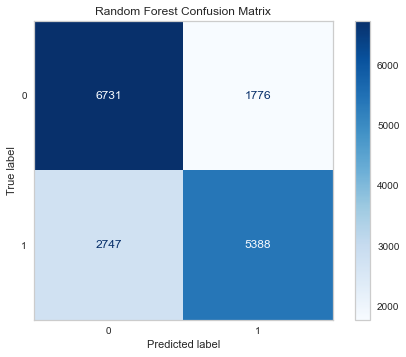

In [73]:
rf_model = RandomForestClassifier(criterion='gini', max_depth=9, n_estimators=8, n_jobs=2)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(rf_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the Random Forest model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the Random Forest model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the Random Forest model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest Confusion Matrix")
plt.grid(visible=False)
plt.show()

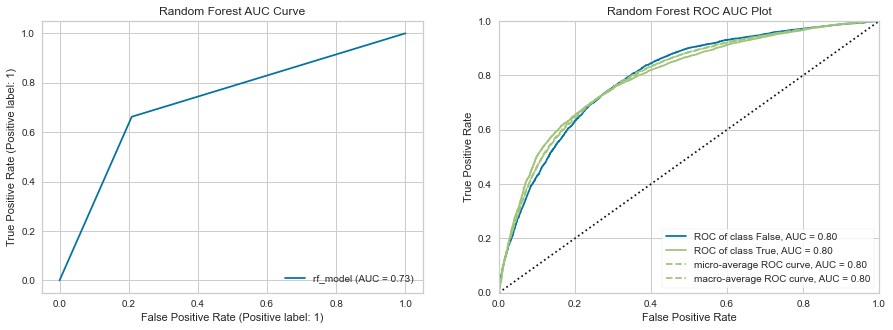

In [74]:
plt.figure(figsize=(15, 5))

from sklearn.metrics import RocCurveDisplay
ax1 = plt.subplot(1,2,1)
disp_roc = RocCurveDisplay.from_predictions(y_val,y_pred, ax=ax1, name="rf_model")
plt.title("Random Forest AUC Curve")

from yellowbrick.classifier import ROCAUC
ax2 = plt.subplot(1,2,2)
rocauc = ROCAUC(rf_model, classes=['False', 'True'], ax=ax2,
                   title='Random Forest ROC AUC Plot')
rocauc.fit(X_train, y_train)
rocauc.score(X_val, y_val)
rocauc.finalize()

plt.show()

In [75]:
model_comparison['Random Forest']=[accuracy,
                                   f1score,
                                   np.mean(cv)]

In [78]:
#gridsearch to find best parameters for Adaboost classifier
params = {'n_estimators' : range(2,11,1),
         'random_state': range(0,50, 5),
         'learning_rate': np.arange(0.1, 1.0, 0.1)}

grid = GridSearchCV(AdaBoostClassifier(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_val) 

Accuracy of the AdaBoost model: 72.31%

f1 score of the AdaBoost model: 72.52%

Cross validation accuracy of the AdaBoost model: 72.48%

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75      9783
           1       0.64      0.76      0.69      6859

    accuracy                           0.72     16642
   macro avg       0.72      0.73      0.72     16642
weighted avg       0.74      0.72      0.73     16642



<Figure size 720x360 with 0 Axes>

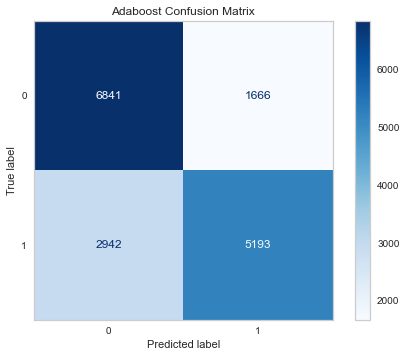

In [77]:
ada_model = AdaBoostClassifier(learning_rate=0.8, n_estimators=10, random_state=0)

ada_model.fit(X_train, y_train)
y_pred = ada_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(ada_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the AdaBoost model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the AdaBoost model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the AdaBoost model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ada_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Adaboost Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [79]:
model_comparison['Ada Boost']=[accuracy,
                                   f1score,
                                   np.mean(cv)]

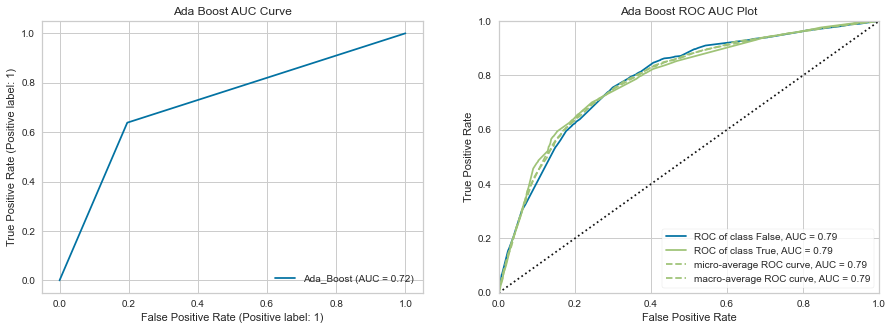

In [80]:
plt.figure(figsize=(15, 5))

from sklearn.metrics import RocCurveDisplay
ax1 = plt.subplot(1,2,1)
disp_roc = RocCurveDisplay.from_predictions(y_val,y_pred, ax=ax1, name="Ada_Boost")
plt.title("Ada Boost AUC Curve")

from yellowbrick.classifier import ROCAUC
ax2 = plt.subplot(1,2,2)
ada_rocauc = ROCAUC(ada_model, classes=['False', 'True'], ax=ax2,
                   title='Ada Boost ROC AUC Plot')
ada_rocauc.fit(X_train, y_train)
ada_rocauc.score(X_val, y_val)
ada_rocauc.finalize()

plt.show()

In [81]:
#gridsearch to find best parameters for Adaboost classifier
params = {'max_iter' : range(2,11,1),
         'random_state': range(0,50, 5),
         'kernel': ['rbf','linear', 'sigmoid']}

grid = GridSearchCV(SVC(), params, refit = True, verbose = 3,n_jobs=-1, scoring='accuracy', cv=5) 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_val) 

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
{'kernel': 'linear', 'max_iter': 7, 'random_state': 0}


Accuracy of the SVC model: 57.62%

f1 score of the SVC model: 58.38%

Cross validation accuracy of the SVC model: 57.13%

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.62      0.52      6106
           1       0.71      0.55      0.62     10536

    accuracy                           0.58     16642
   macro avg       0.58      0.59      0.57     16642
weighted avg       0.62      0.58      0.58     16642



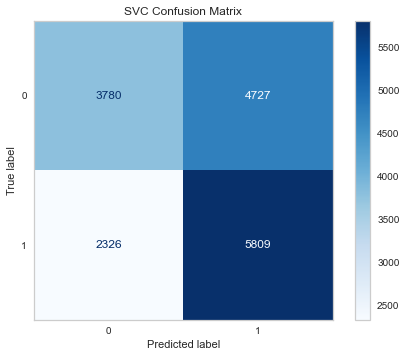

In [82]:
svc_model = SVC(kernel='linear', max_iter=7, random_state=0)

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_val)

accuracy = accuracy_score(y_val,y_pred)
f1score = metrics.f1_score(y_pred,y_val,average='weighted')

kfold = KFold(n_splits=5)
cv = cross_val_score(svc_model,X_train,y_train,cv=kfold)

report = classification_report(y_pred,y_val, zero_division=1)

print(f"Accuracy of the SVC model: {round(accuracy*100, 2)}%\n")
print(f"f1 score of the SVC model: {round(f1score*100, 2)}%\n")
print(f"Cross validation accuracy of the SVC model: {round(np.mean(cv)*100, 2)}%\n")
print("Classification Report:\n", report)

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svc_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("SVC Confusion Matrix")
plt.grid(visible=False)
plt.show()

In [83]:
model_comparison['SVC']=[accuracy,
                                   f1score,
                                   np.mean(cv)]

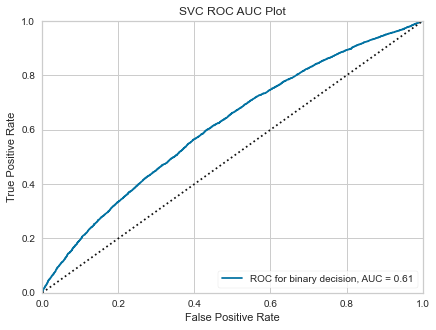

In [84]:
plt.figure(figsize=(15, 5))

from yellowbrick.classifier import ROCAUC
ax2 = plt.subplot(1,2,1)
rocauc = ROCAUC(svc_model, classes=['False', 'True'], ax=ax2,
                   title='SVC ROC AUC Plot', binary=True)
rocauc.fit(X_train, y_train)
rocauc.score(X_val, y_val)
rocauc.finalize()

plt.show()

In [85]:
#Details of all the models in comparison
models_df=pd.DataFrame(model_comparison).T
models_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy']
models_df=models_df.sort_values(by='CV Accuracy',ascending=False)
models_df.style.format("{:.2%}").background_gradient(cmap='Greens')

,Model Accuracy,Model F1-Score,CV Accuracy
Random Forest,72.82%,72.95%,73.04%
Decision Tree,72.87%,73.00%,72.79%
Ada Boost,72.31%,72.52%,72.48%
SVC,57.62%,58.38%,57.13%


The random forest model outperforms the other models in all the aspects, accuracy, f1-score, and cross-validation accuracy. THe AUC of random forest is also more compared to the other models. Therefore, we can say that the random forest model is the best model for this dataset. A further will be made where I will take this dataset and run it through deep learning neural network model in the future.

# Prediction

In [86]:
test = [[35,1,168,62,110,70,1,0,1,0,1, 30.0]]
test = norm.transform(test)

In [87]:
pred = rf_model.predict(test)

In [88]:
if pred:
    print("Cardiovascular Disease Detected!")
else:
    print("NO! Cardiovascular Disease" )

NO! Cardiovascular Disease


## Export model

In [89]:
import pickle
filename = 'CVD_RF_model.pkl'
pickle_out =  open(filename, 'wb')
pickle.dump(rf_model, open(filename, 'wb'))
pickle_out.close()